# Heart Failure Predictions
In this notebook I will try to predict heart failure using ANN and tensorflow. For this assignment I worked together with Marjolein van der Eerden.

### Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk

import keras
import tensorflow as tf


print('Pandas version:', pd.__version__)
print('Numpy version:', np.__version__)
print('Seaborn version:', sns.__version__)
print('Keras version:', keras.__version__)
print('Tensorflow version:', tf.__version__)

Pandas version: 2.0.3
Numpy version: 1.25.1
Seaborn version: 0.12.2
Keras version: 3.5.0
Tensorflow version: 2.17.0


### Loading the data
For this assignment the following dataset will be used: https://www.kaggle.com/datasets/andrewmvd/heart-failure-clinical-data. The following tutorial was used for making the model: https://www.freecodecamp.org/news/binary-classification-made-simple-with-tensorflow/


The following features can be found in the dataset.
* age: Age of the patient
* anaemia: If the patient had the haemoglobin below the normal range, 1 is true and 0 is false.
* creatinine_phosphokinase: The level of the creatine phosphokinase in the blood in mcg/L
* diabetes: If the patient was diabetic, 1 is true and 0 is false.
* ejection_fraction: Ejection fraction is a measurement of how much blood the left ventricle pumps out with each contraction
* high_blood_pressure: If the patient had hypertension, 1 is true and 0 is false.
* platelets: Platelet count of blood in kiloplatelets/mL
* serum_creatinine: The level of serum creatinine in the blood in mg/dL
* serum_sodium: The level of serum sodium in the blood in mEq/L
* sex: The sex of the patient. In this case males are listed as 1 and females as 0.
* smoking: If the patient smokes actively or ever did in pastm 1 is true and 0 is false.
* time: It is the time of the patient's follow-up visit for the disease in months
* DEATH_EVENT: If the patient deceased during the follow-up period, 1 is true and 0 is false.

The target variable for this dataset is the death event.

In [2]:
df = pd.read_csv('./data/heart_failure_clinical_records_dataset.csv')

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


### Exploring the data
First let's take a quick look at the data, to see if there is any missing data.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


It appears there are no null values in the dataset. 

In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


By looking at the mean values we can see the distribution of male/female is not evenly distributed, there are more male patients in this dataset than female patients. We can also see most patients are non-smoking and do not have diabetes, high blood pressure or aneamia. By looking at the age distribution we can see the age ranges between 40 and 95, and the mean age is 60.

# Modelling

In [5]:
df = df.sample(frac=1).reset_index(drop=True)

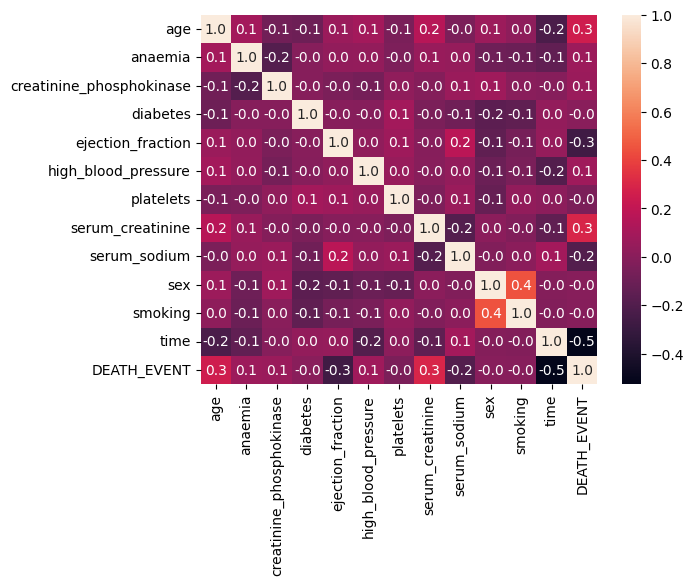

In [6]:
heatmap = sns.heatmap(df.corr(numeric_only=True), cbar=True, annot=True, fmt=".1f")

The correlations between the features and the target variable appear to be low.

#### Preprocessing

Let's split the target and features.

In [7]:
target = 'DEATH_EVENT'
features = df.drop(target, axis=1)

X = features
y = df[target]

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=22)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 299 observations, of which 239 are now in the train set, and 60 in the test set.


Normalising the dataset.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#### Modelling
First we are gonna build the model.

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Input

# initialising the ANN
model = Sequential()

# adding layers to the ANN
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

Output layer is 1, because it is a binary classification problem. Sigmoid is chosen because it is commonly used for binary classification problems. 

#### Training the model
For the first version of this model I will train the basic model with 50 epochs, this means the model will iterate over the dataset 50 times.

In [11]:
model.fit(X_train, y_train, epochs=50)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6624 - loss: 0.6323  
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - accuracy: 0.6495 - loss: 0.6258
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6744 - loss: 0.6186 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - accuracy: 0.7268 - loss: 0.5743
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.6959 - loss: 0.6055
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 660us/step - accuracy: 0.7014 - loss: 0.6147
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - accuracy: 0.7084 - loss: 0.5984
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 607us/step - accuracy: 0.7553 - loss: 0.5569
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.7428 - loss: 0.5627
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 642us/step - accuracy: 0.7815 - loss: 0.5489
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - accuracy: 0.7619 - loss: 0.5500
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 482us/step - accuracy: 0.7505 - los

The accuracy improves and the loss decreases.

In [12]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)
print('Loss = ',loss_and_metrics[0])
print('Accuracy = ',loss_and_metrics[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8049 - loss: 0.4785 
[0.45676901936531067, 0.8166666626930237]
Loss =  0.45676901936531067
Accuracy =  0.8166666626930237


Here we can see the model is quite overfitted, the accuracy for the test set is quite a bit lower than the accuracy of the train set. The loss is also quite high.

Now let's add a batch size and a different number of epochs.

In [13]:
# initialising the ANN
model = Sequential()

# adding layers to the ANN
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4453 - loss: 0.7470 - val_accuracy: 0.6833 - val_loss: 0.6272
Epoch 2/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 892us/step - accuracy: 0.5556 - loss: 0.6588 - val_accuracy: 0.7333 - val_loss: 0.5954
Epoch 3/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 913us/step - accuracy: 0.6654 - loss: 0.6062 - val_accuracy: 0.7333 - val_loss: 0.5719
Epoch 4/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.7117 - loss: 0.5759 - val_accuracy: 0.7833 - val_loss: 0.5484
Epoch 5/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 751us/step - accuracy: 0.7841 - loss: 0.5562 - val_accuracy: 0.8000 - val_loss: 0.5221
Epoch 6/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - accuracy: 0.8122 - loss: 0.5060 - val_accuracy: 0.8333 - val_loss: 0.4967
Epoch 7/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - accuracy: 0.7845 - loss: 0.5066 - val_accuracy: 0.8500 - val_loss: 0.4720
Epoch 8/100
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.8416 - loss: 0.4433 - val_accura

The accuracy is higher compared to the previous model, however the validation accuracy is higher than the accuracy of the train data. This means the model is overfitted.


In [14]:
# initialising the ANN
model = Sequential()

# adding layers to the ANN
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6296 - loss: 0.6602 - val_accuracy: 0.6167 - val_loss: 0.6463
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6697 - loss: 0.6429 - val_accuracy: 0.6333 - val_loss: 0.6370
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6977 - loss: 0.6300 - val_accuracy: 0.6333 - val_loss: 0.6283
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7032 - loss: 0.6161 - val_accuracy: 0.6333 - val_loss: 0.6199
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7362 - loss: 0.5956 - val_accuracy: 0.6667 - val_loss: 0.6122
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7500 - loss: 0.5920 - val_accuracy: 0.6667 - val_loss: 0.6044
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7611 - loss: 0.5922 - val_accuracy: 0.6667 - val_loss: 0.5975
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7823 - loss: 0.5657 - val_accuracy: 0.6833 - val_loss: 0.5901
Epoch 9/

Increasing the batch size has improved the problem of overfitting.

#### Evaluation

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


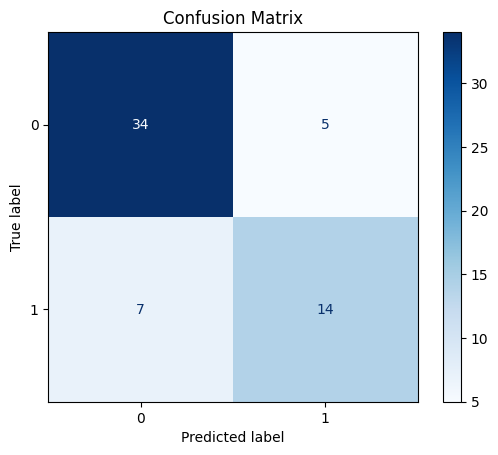

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# import matplotlib.pyplot as plt
 
# Predict the labels for the test set
y_pred = (model.predict(X_test)>0.5).astype("int32")
 
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Let's try making some changes to the model, this time I will add another hidden layer to see how this influences the performance of the model.

In [16]:
# initialising the ANN
model = Sequential()

# adding layers to the ANN
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # hidden layer
model.add(Dense(units=4, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3007 - loss: 0.8026 - val_accuracy: 0.2833 - val_loss: 0.7903
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3056 - loss: 0.7813 - val_accuracy: 0.2500 - val_loss: 0.7698
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3431 - loss: 0.7416 - val_accuracy: 0.2667 - val_loss: 0.7526
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.3326 - loss: 0.7413 - val_accuracy: 0.2667 - val_loss: 0.7376
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3395 - loss: 0.7226 - val_accuracy: 0.3000 - val_loss: 0.7268
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4235 - loss: 0.7030 - val_accuracy: 0.3500 - val_loss: 0.7191
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4298 - loss: 0.6955 - val_accuracy: 0.5000 - val_loss: 0.7126
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5322 - loss: 0.6778 - val_accuracy: 0.5500 - val_loss: 0.7068
Epoch 9/

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


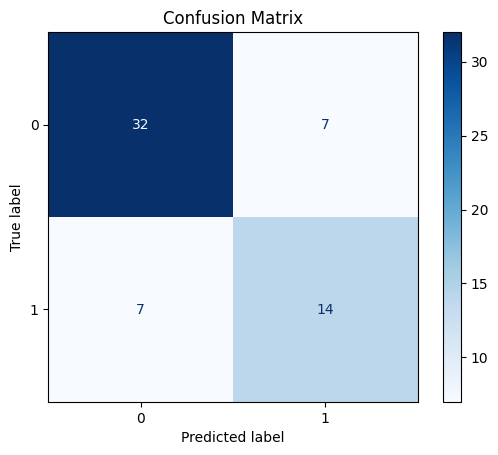

In [17]:
# Predict the labels for the test set
y_pred = (model.predict(X_test)>0.5).astype("int32")
 
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Here we can see there are a few false positives and a few false negatives. For predicting heart failure a false negative is not good. 

In [18]:
# initialising the ANN
model = Sequential()

# adding layers to the ANN
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(units=16, activation='relu')) # input layer
model.add(Dense(units=8, activation='relu')) # hidden layer
model.add(Dense(units=4, activation='relu')) # hidden layer
model.add(Dense(units=2, activation='relu')) # hidden layer
model.add(Dense(1, activation='sigmoid')) # output layer

adam = keras.optimizers.Adam(learning_rate=0.001)

# compiling the model
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=["accuracy"])

model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.2963 - loss: 0.7579 - val_accuracy: 0.3667 - val_loss: 0.7216
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3039 - loss: 0.7344 - val_accuracy: 0.3667 - val_loss: 0.7108
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3391 - loss: 0.7241 - val_accuracy: 0.4000 - val_loss: 0.7025
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3201 - loss: 0.7039 - val_accuracy: 0.4667 - val_loss: 0.6951
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4071 - loss: 0.6985 - val_accuracy: 0.5500 - val_loss: 0.6883
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5015 - loss: 0.6854 - val_accuracy: 0.5667 - val_loss: 0.6834
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.6763 - val_accuracy: 0.6500 - val_loss: 0.6801
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6265 - loss: 0.6769 - val_accuracy: 0.6833 - val_loss: 0.6768
Epoch 9

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/stepWARNING:tensorflow:6 out of the last 6 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x2bfe24e00> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


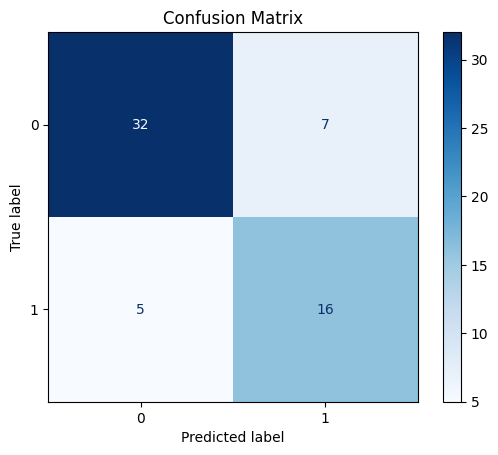

In [19]:
# Predict the labels for the test set
y_pred = (model.predict(X_test)>0.5).astype("int32")
 
# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

By adding another hidden layer we can see the accuracy has decreased a lot and the loss is also very high. This means the model does not perform well, probably because the neurons in the extra layers are too specific.